loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


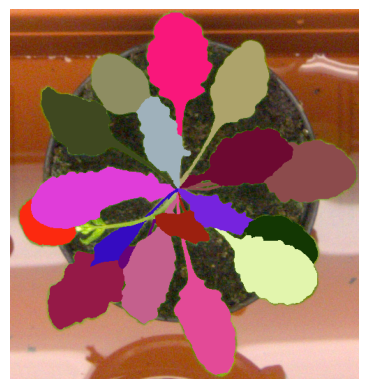

In [32]:
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from pycocotools import mask as maskUtils

# Paths
coco_json = "cvppp_a1_train.json"
images_dir = "./"  # folder with *_rgb.png

# Load COCO data
coco = COCO(coco_json)

# Pick a random image
img_ids = coco.getImgIds()
img_id = int(np.random.choice(img_ids))  # random ID
img_info = coco.loadImgs([img_id])[0]    # wrap ID in list
img_path = f"{images_dir}/{img_info['file_name']}"
image = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

# Load annotations for this image
ann_ids = coco.getAnnIds(imgIds=img_info['id'])
anns = coco.loadAnns(ann_ids)

# Show image
plt.imshow(image)
plt.axis("off")

# Draw segmentations
for ann in anns:
    mask = maskUtils.decode(ann["segmentation"])
    # Overlay mask
    color = np.random.rand(3)
    image[mask == 1] = (color * 255).astype(np.uint8)
    plt.imshow(image)

plt.show()
